In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action ='ignore')

## Loading Dataset

In [235]:
wine = pd.read_csv("WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [236]:
wine.shape

(1143, 13)

In [237]:
# Some information about dataset

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [238]:
# Some statistical information about dataset

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Finding Null Values

In [239]:
 wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [240]:
wine.drop(['Id'], axis = 1, inplace = True)

## Correlation Matrix

In [241]:
plt.figure(figsize = (10,10))
wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


<Figure size 1000x1000 with 0 Axes>

## Detection of outliers using z-score

In [242]:
from scipy import stats
z = np.abs(stats.zscore(wine))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

z > 3(Threshold) --> This is an Outlier

In [243]:
print(np.where(z>3)) 

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122]), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  4,  1,  4,  9

Remove those records whose z > 3(outlier)

In [244]:
wine = wine[(z < 3).all(axis =1)]  

In [245]:
wine.shape

(1041, 12)

## Data Analysis

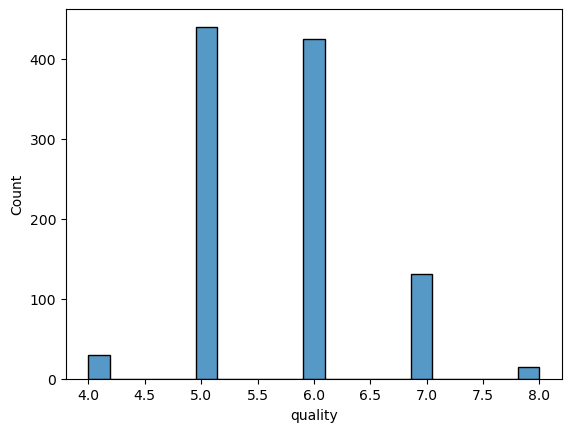

In [246]:
sns.histplot(wine['quality'])
plt.show()

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

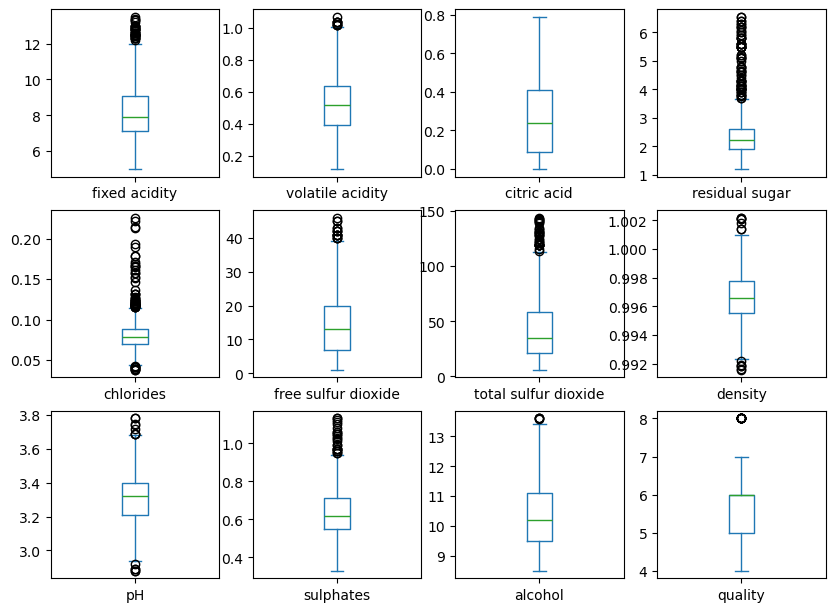

In [247]:
wine.plot(kind ='box', subplots = True , layout = (4,4), sharex = False, figsize = (10,10))

<Axes: >

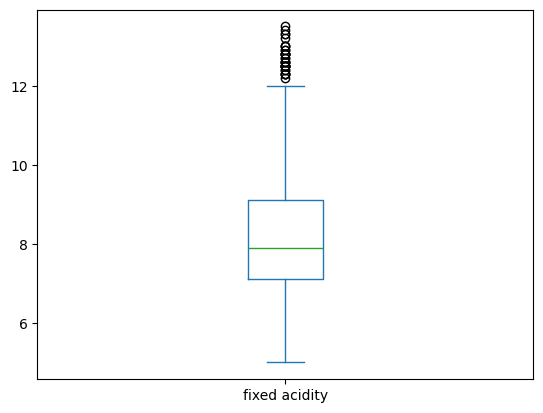

In [248]:
wine['fixed acidity'].plot(kind = 'box')

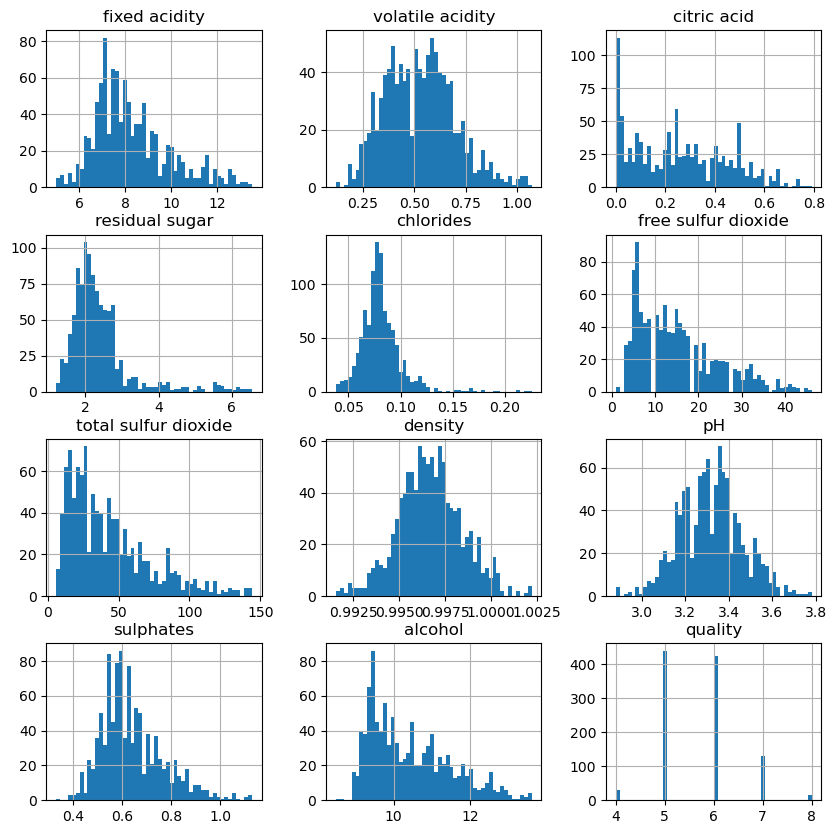

In [249]:
wine.hist(figsize = (10,10), bins = 50)
plt.show()

## Feature Selection

In [250]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
135,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5,5
523,7.0,0.45,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,9.5,5
808,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
116,7.8,0.63,0.48,1.7,0.100,14.0,96.0,0.99610,3.19,0.62,9.5,5
361,13.3,0.29,0.75,2.8,0.084,23.0,43.0,0.99860,3.04,0.68,11.4,7


In [251]:
wine['quality'].unique()

array([5, 6, 7, 4, 8])

In [252]:
# If wine qulaity is 7 or above then will consider as good qulaity wine

wine['goodquality'] = [1 if x >= 7 else 0 for x in wine['quality']]
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [253]:
# Separate depedent and indepedent variables

X = wine.drop(['quality','goodquality'], axis = 1)
Y = wine['goodquality']

In [254]:
wine['goodquality'].value_counts()

goodquality
0    895
1    146
Name: count, dtype: int64

 ## Feature Importance

In [255]:
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.06910575 0.10651094 0.10369149 0.07799783 0.06578197 0.0636701
 0.07161944 0.08519748 0.06672781 0.11394605 0.17575115]


## Splitting Dataset

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state =13)

## Result

In [257]:
model_res = pd.DataFrame(columns = ['Model', 'Score'])

## Logistic Regression :

In [258]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#accuracy_score

from sklearn.metrics import accuracy_score, confusion_matrix
model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test, y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.873563


## Using KNN :

In [259]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#accuracy_score

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['KNeighborsClassifier', accuracy_score(Y_test, y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.873563
1,KNeighborsClassifier,0.854406


## Using SVC()

In [260]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#accuracy_score

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['SVC', accuracy_score(Y_test, y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.873563
1,KNeighborsClassifier,0.854406
2,SVC,0.865900


## Using Decision Tree:

In [261]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#accuracy_score

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['DecisionTreeClassifier', accuracy_score(Y_test, y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.873563
1,KNeighborsClassifier,0.854406
2,SVC,0.865900
3,DecisionTreeClassifier,0.869732


## Using Random Forest:

In [262]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

#accuracy_score

from sklearn.metrics import accuracy_score
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_score(Y_test, y_pred)]
model_res

,Model,Score
0,LogisticRegression,0.873563
1,KNeighborsClassifier,0.854406
2,SVC,0.865900
3,DecisionTreeClassifier,0.869732
4,RandomForestClassifier,0.900383


With RandomForestClassifier we got Maximum Acuuracy : 90.04%

In [ ]:
from sklearn import tree
plt.figure(figsize = (20,20))
for i in range(len(model.estimators_)):
    tree.plot_tree(model.estimators_[i], filled= True)